In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor



Load the dataset

In [92]:
data = pd.read_csv('/content/Amazon Sale Report.csv')
data.head()

<ipython-input-92-f279d3b79c5e>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Data Visualization

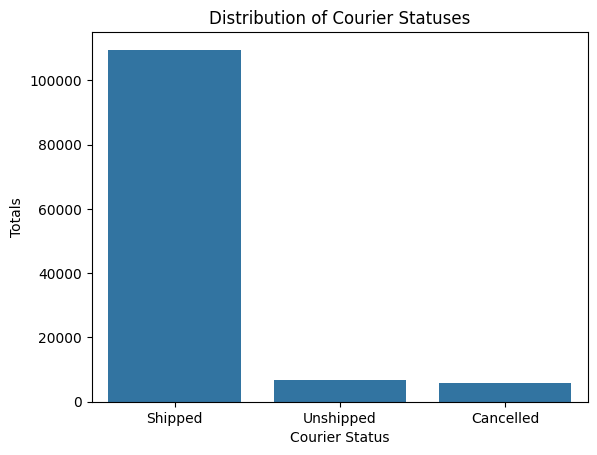

In [165]:
value = data['Courier Status'].value_counts()

sns.barplot(x=value.index, y=value.values)
plt.xlabel('Courier Status')
plt.ylabel('Totals')
plt.title('Distribution of Courier Statuses')
plt.show()

In [93]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [94]:
data["Date"] = pd.to_datetime(data["Date"])
data.head()

<ipython-input-94-522d187a19b0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [95]:
data["Sales Channel"] = data["Sales Channel "]

In [96]:
data["Order ID"] = data["Order ID"].str.replace('-','')

data["Sales Channel"] = data["Sales Channel"].str.replace('.','')
data["Sales Channel"] = data["Sales Channel"].str.replace('-','')

data["SKU"] = data["SKU"].str.replace('-','')



Handling missing values

In [97]:
data.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
Sales Channel             0
dtype: int64

In [98]:
columns = ["fulfilled-by","Unnamed: 22","promotion-ids","Sales Channel "]

filtered_data = data.drop(columns,axis=1)
filtered_data.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales Channel
0,0,40580787845731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389KRNPS,Set,S,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Amazonin
1,1,17191981511101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781KRXXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Amazonin
2,2,40406876767273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371KRXL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Amazonin
3,3,40396153778133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341DRL,Western Dress,L,...,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Amazonin
4,4,40710697907240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671TUXXXL,Top,3XL,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Amazonin


In [99]:
filtered_data[["Shipping Status","Delivery Status"]] = filtered_data["Status"].str.split("-",expand=True)
filtered_data.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales Channel,Shipping Status,Delivery Status
0,0,40580787845731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389KRNPS,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Amazonin,Cancelled,None
1,1,17191981511101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781KRXXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Amazonin,Shipped,Delivered to Buyer
2,2,40406876767273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371KRXL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Amazonin,Shipped,None
3,3,40396153778133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341DRL,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Amazonin,Cancelled,None
4,4,40710697907240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671TUXXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Amazonin,Shipped,None


In [100]:
filtered_data = filtered_data.drop("Status",axis=1)
filtered_data.head()

,index,Order ID,Date,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales Channel,Shipping Status,Delivery Status
0,0,40580787845731545,2022-04-30,Merchant,Standard,SET389,SET389KRNPS,Set,S,B09KXVBD7Z,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Amazonin,Cancelled,None
1,1,17191981511101146,2022-04-30,Merchant,Standard,JNE3781,JNE3781KRXXXL,kurta,3XL,B09K3WFS32,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Amazonin,Shipped,Delivered to Buyer
2,2,40406876767273146,2022-04-30,Amazon,Expedited,JNE3371,JNE3371KRXL,kurta,XL,B07WV4JV4D,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Amazonin,Shipped,None
3,3,40396153778133951,2022-04-30,Merchant,Standard,J0341,J0341DRL,Western Dress,L,B099NRCT7B,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Amazonin,Cancelled,None
4,4,40710697907240320,2022-04-30,Amazon,Expedited,JNE3671,JNE3671TUXXXL,Top,3XL,B098714BZP,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Amazonin,Shipped,None


In [101]:
filtered_data["ship-country"].unique()

array(['IN', nan], dtype=object)

In [102]:
filtered_data.isna().sum()

index                     0
Order ID                  0
Date                      0
Fulfilment                0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
B2B                       0
Sales Channel             0
Shipping Status           0
Delivery Status       96802
dtype: int64

In [103]:
columns = ["ship-country","Delivery Status"]
filtered_data = filtered_data.drop(columns, axis=1)


In [104]:
filtered_data.isna().sum()

index                    0
Order ID                 0
Date                     0
Fulfilment               0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-postal-code        33
B2B                      0
Sales Channel            0
Shipping Status          0
dtype: int64

In [105]:
columns = ["Courier Status", "Amount","ship-city"]
filtered_data = filtered_data.dropna(subset=columns)


In [106]:
filtered_data = filtered_data.drop(["currency"], axis=1)


In [107]:
filtered_data.isna().sum()

index                 0
Order ID              0
Date                  0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
B2B                   0
Sales Channel         0
Shipping Status       0
dtype: int64

In [109]:
filtered_data.columns

Index(['index', 'Order ID', 'Date', 'Fulfilment', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B',
       'Sales Channel', 'Shipping Status'],
      dtype='object')

In [119]:
current_date = pd.Timestamp.now().normalize()


filtered_data['date'] = pd.to_datetime(filtered_data['date'])


filtered_data['date'] = (current_date - filtered_data['date']).dt.days





In [128]:
filtered_data.head()

,index,Order ID,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B,Sales Channel,Shipping Status,date
1,1,17191981511101146,Merchant,Standard,JNE3781,JNE3781KRXXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,False,Amazonin,Shipped,19900
2,2,40406876767273146,Amazon,Expedited,JNE3371,JNE3371KRXL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,True,Amazonin,Shipped,19900
4,4,40710697907240320,Amazon,Expedited,JNE3671,JNE3671TUXXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,False,Amazonin,Shipped,19900
5,5,40414909844578765,Amazon,Expedited,SET264,SET264KRNPXL,Set,XL,B08YN7XDSG,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,False,Amazonin,Shipped,19900
6,6,40857484996859555,Amazon,Expedited,J0095,J0095SETL,Set,L,B08CMHNWBN,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,False,Amazonin,Shipped,19900


In [136]:
columns=["Sales Channel", "Shipping Status"]
filtered_data = filtered_data.drop(columns, axis=1)

Changing the categorical data to numerical data

In [138]:
filtered_data["Fulfilment"]=filtered_data["Fulfilment"].str.replace("Amazon","1")
filtered_data["Fulfilment"]=filtered_data["Fulfilment"].str.replace("Merchant","2")
filtered_data["ship-service-level"] = filtered_data["ship-service-level"].str.replace("Standard","1")
filtered_data["ship-service-level"] = filtered_data["ship-service-level"].str.replace("Expedited","2")
filtered_data["Courier Status"] = filtered_data["Courier Status"].str.replace("Shipped","1")
filtered_data["Courier Status"] = filtered_data["Courier Status"].str.replace("Unshipped","2")



In [143]:


filtered_data["Style"] = filtered_data["Style"].astype("str")


In [142]:
filtered_data["Style"].unique()

array(['JNE3781', 'JNE3371', 'JNE3671', ..., 'J0286', 'J0053', 'SET045'],
      dtype=object)

In [ ]:
columns = ["Style","SKU","Category","Size","ASIN","ship-city","ship-state"]

In [155]:

from sklearn.model_selection import train_test_split
X= filtered_data.drop("Courier Status",axis=1)
y= filtered_data["Courier Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)
from sklearn.ensemble import RandomForestRegressor
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


In [158]:
R2 = r2_score(y_test, y_pred)
print("R2 Score:", R2)

R2 Score: 0.1525816399119181
